### Malicious Website Analysis

* URL: it is the anonimous identification of the URL analyzed in the study
* URL_LENGTH: it is the number of characters in the URL
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
* CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
* APP_BYTES: this is the number of bytes transfered
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server
* REMOTE_APP_PACKETS: packets received from the server
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


__6 numerical and categorical variables below.__

__TYPE__: this is a categorical variable, its values represent the type of web page analyzed, specifically, 
1 is for malicious websites and 0 is for benign websites.

__URL_LENGTH__: it is the number of characters in the URL.

__CHARSET__: it is a categorical value and its meaning is the character encoding standard (also called character set).

__CONTENT_LENGTH__: it represents the content size of the HTTP header.

__APP_BYTES__: this is the number of bytes transfered

__SOURCE_APP_PACKETS__: packets sent from the honeypot to the server.

__REMOTE_APP_PACKETS__: packets received from the server.

##### Business Question ? #####
1) Detecting and Analyisis of Malicious Web Site Behavior

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Callable, List

class rawData:
    def __init__(self, filename):
        self.filename = filename
    @staticmethod    
    def validate(self):
        try:
            if self.filename.endswith('.csv') is True:
                return True
            else:
                return ("please make sure you have right file extension")
        except Exception as e:
               return e
    def readData(self):
        try:
            data = self.validate(self.filename)
            if(data):
                return pd.read_csv(self.filename)
            else:
                return ("your file is corrupted, please check your file")
        except Exception as e:
            return e
        
    
data = rawData('./dataset.csv')
init_dataFrame = pd.DataFrame(data.readData())


targetedVariables = pd.DataFrame(init_dataFrame[[
                                                "Type",
                                                "URL_LENGTH",
                                                "CHARSET",
                                                "CONTENT_LENGTH",
                                                "APP_BYTES",
                                                "SOURCE_APP_PACKETS",
                                                "REMOTE_APP_PACKETS"
                                                ]])



class AggregateFunctions:
    def __init__(self, data=None):
        self.data = data
    
    def isEmpty(self):
        return self.data.empty

    def getMean(self, c:str)-> str:
        if (self.isEmpty() == False):
            return(self.data[c].mean( skipna=True))
            
    def getMedian(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].median( skipna=True))
            
    def getMin(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].min( skipna=True))
            
    def getMax(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].max( skipna=True))
            


    
            
#Samples from raw dataset ; first 100 rows 
init_dataFrame.head(100)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M0_75,27,7,UTF-8,Apache,193.0,US,PA,19/01/2015 0:00,3/03/2017 0:00,...,0,1,1838,11,13,4524,1992,11,2.0,1
96,B0_1209,27,8,UTF-8,nginx,NaN,US,WA,11/11/2015 0:00,13/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
97,B0_1353,27,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/03/2017 0:00,23/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
98,B0_2085,27,6,utf-8,openresty/1.11.2.1,NaN,US,TEXAS,3/11/2009 0:00,4/03/2017 0:00,...,3,1,366,3,5,306,366,3,0.0,0


 
##### The input variable(s) of the project. #####
3) Below the variables are the input variables for creating the model.



In [5]:

#Samples from selected variables ; first 100 rows 
targetedVariables.head(100).mask(targetedVariables.eq('None')).dropna()



/Users/sadikerisen/opt/anaconda3/envs/DetectingMaliciousWebsites/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
0,1,16,iso-8859-1,263.0,700,9,10
1,0,16,UTF-8,15087.0,1230,17,19
2,0,16,us-ascii,324.0,0,0,0
3,0,17,ISO-8859-1,162.0,3812,39,37
4,0,17,UTF-8,124140.0,4278,61,62
6,0,18,iso-8859-1,345.0,1189,14,13
7,0,19,us-ascii,324.0,0,0,0
11,0,20,us-ascii,324.0,0,0,0
12,0,20,utf-8,13716.0,1492,20,20
13,0,20,ISO-8859-1,3692.0,3946,35,29


In [6]:
#the summary statistics of the character columns.
init_dataFrame.describe(include=['object'])

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
count,1781,1781,1780,1781,1781,1781,1781
unique,1781,9,239,49,182,891,594
top,B0_591,UTF-8,Apache,US,CA,None,None
freq,1,676,386,1103,372,127,139


In [7]:
targetedVariables.describe(include=['object'])

,CHARSET
count,1781
unique,9
top,UTF-8
freq,676


In [8]:
#the summary statistics of all the columns.
init_dataFrame.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_591,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [9]:
targetedVariables.describe(include='all')

,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
count,1781.000000,1781.000000,1781,969.000000,1.781000e+03,1781.000000,1781.000000
unique,NaN,NaN,9,NaN,NaN,NaN,NaN
top,NaN,NaN,UTF-8,NaN,NaN,NaN,NaN
freq,NaN,NaN,676,NaN,NaN,NaN,NaN
mean,0.121280,56.961258,NaN,11726.927761,2.982339e+03,18.540146,18.746210
std,0.326544,27.555586,NaN,36391.809051,5.605057e+04,41.627173,46.397969
min,0.000000,16.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,39.000000,NaN,324.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,49.000000,NaN,1853.000000,6.720000e+02,8.000000,9.000000
75%,0.000000,68.000000,NaN,11323.000000,2.328000e+03,26.000000,25.000000


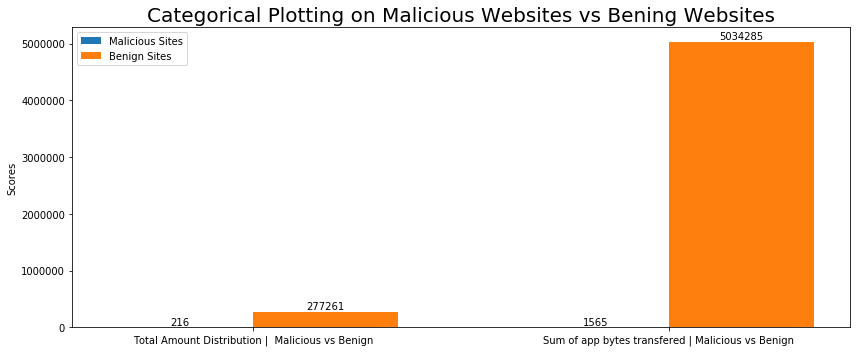

In [10]:
d = targetedVariables[["APP_BYTES","Type"]]
benignSites = list(filter(lambda x: x == 0, d.Type))
maliciousSites = list(filter(lambda x: x == 1, d.Type))

sumBenign = [] 
sumMalicious= []

for i in range(0, len(d)):
    if(d.Type[i] == 0):
        sumBenign.insert(i, d.APP_BYTES[i])

    else:
        sumMalicious.insert(i, d.APP_BYTES[i])
        

data = {
    'Malicious Sites': [
        len(maliciousSites), 
        sum(sumMalicious)], 
    'Benign Sites': [
        len(benignSites), 
        sum(sumBenign)
    ]
}


names = list(data.keys())
values = list(data.values()) 

labels = [names[0], names[1]]
m = [values[0][0], values[1][0]]
b = [values[0][1], values[1][1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=names[0])
rects2 = ax.bar(x + width/2, b, width, label=names[1])


ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["Total Amount Distribution |  Malicious vs Benign","Sum of app bytes transfered | Malicious vs Benign" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()







Text(0.5, 0.98, 'Categorical Plotting by Country')

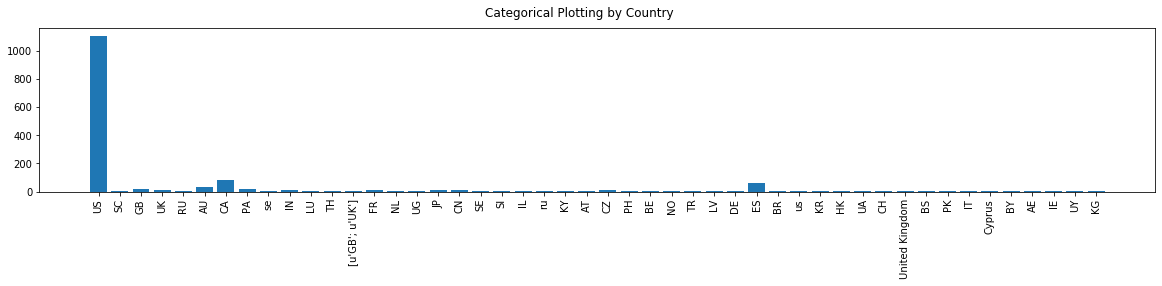

In [11]:
from collections import Counter
x = list(filter(lambda x: x != 'None', init_dataFrame.WHOIS_COUNTRY))
country_list=[k for k,v in Counter(x).items() if v > 1]

data = dict(Counter(x))
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(20, 3))
plt.bar(names, values)
plt.xticks(rotation=90)
fig.suptitle('Categorical Plotting by Country')




Text(0.5, 0.98, 'Categorical Plotting CHARSET | URL_LENGTH')

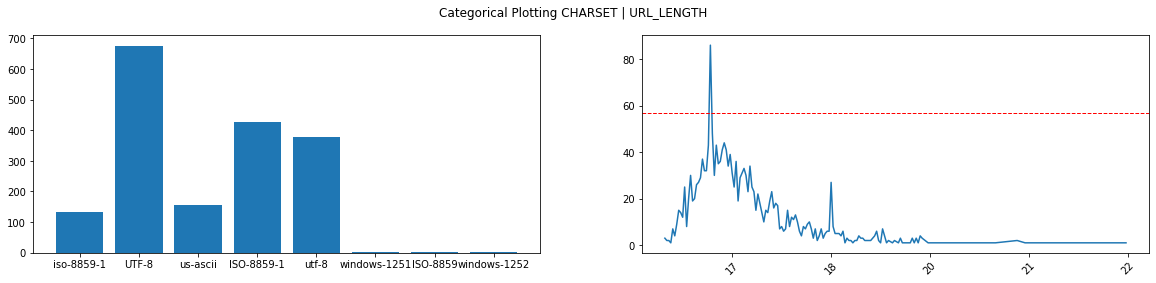

In [12]:

x = list(filter(lambda x: x.lower() != "nan" and x !=  "None", init_dataFrame.CHARSET))
Charset_list=[ k.lower() for k,v in Counter(x).items() if v > 1]
Charset_list = list(dict.fromkeys(Charset_list))


y = list(filter(lambda x: x != "nan" and x != "None", init_dataFrame.URL_LENGTH))
URLLength_list=[k for k,v in Counter(y).items() if v > 1]
URLLength_list = list(dict.fromkeys(URLLength_list))



data = dict(Counter(x))
names = list(data.keys())
values = list(data.values())

data1 = dict(Counter(y))
names1 = list(data1.keys())
values1 = list(data1.values())

fig, axs = plt.subplots(1,2 ,figsize=(20, 4))

axs[0].bar(names, values)
axs[0].set_xticklabels(Charset_list, fontdict=None,  rotation=30 , minor=True,)

axs[1].plot(names1, values1)
axs[1].axhline(init_dataFrame.URL_LENGTH.mean(), color='red', linestyle='dashed', linewidth=1, label="Average Length")
axs[1].set_xticklabels(URLLength_list, fontdict=None,  rotation=45)

fig.suptitle('Categorical Plotting CHARSET | URL_LENGTH')





In [13]:
# comparing the remote/source app transfer packages vs content length on Malicious
def compare(N):
    Sites = init_dataFrame.loc[init_dataFrame['Type'] == N]
    ds = AggregateFunctions(Sites)

    mean = ds.getMean("CONTENT_LENGTH")
    median = ds.getMedian("CONTENT_LENGTH")
    Max = ds.getMax("CONTENT_LENGTH")
    Min = ds.getMin("CONTENT_LENGTH")

    mean2 = ds.getMean("REMOTE_APP_PACKETS")
    median2 = ds.getMedian("REMOTE_APP_PACKETS")
    Max2 = ds.getMax("REMOTE_APP_PACKETS")
    Min2 = ds.getMin("REMOTE_APP_PACKETS")

    mean3 = ds.getMean("SOURCE_APP_PACKETS")
    median3 = ds.getMedian("SOURCE_APP_PACKETS")
    Max3 = ds.getMax("SOURCE_APP_PACKETS")
    Min3 = ds.getMin("SOURCE_APP_PACKETS")

    data= {"Mean":[mean, mean2, mean3], "Median": [median, median2, median3], "Max":[Max, Max2, Max3], "Min":[Min, Min2, Min3]}
    df = pd.DataFrame(data, index=["CONTENT_LENGTH","REMOTE_APP_PACKETS","SOURCE_APP_PACKETS"])
    return df






##### The output variable of the project #####
2) Below the variables are the out put variable after applying the certain functions.

,Mean,Median,Max,Min
CONTENT_LENGTH,12885.064890,3020.0,649263.0,0.0
REMOTE_APP_PACKETS,19.313099,8.0,1284.0,0.0
SOURCE_APP_PACKETS,19.072204,8.0,1198.0,0.0


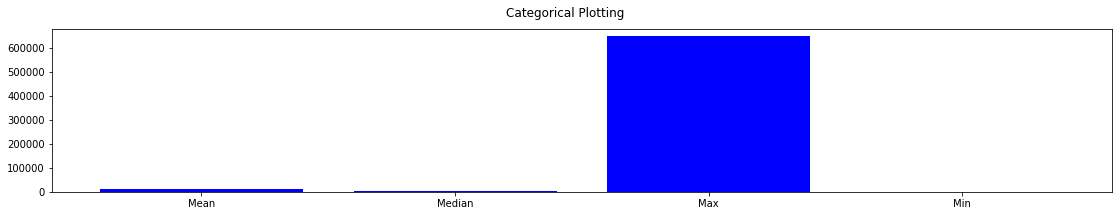

In [14]:
#Benign Web Sites
names = ['Mean', 'Median', 'Max', 'Min']
values = compare(0).values
fig, axs = plt.subplots(figsize=(19, 3), sharey=True)
axs.bar(names, values[0], color="Blue")
fig.suptitle('Categorical Plotting')
compare(0)

,Mean,Median,Max,Min
CONTENT_LENGTH,2297.943396,653.5,27103.0,58.0
REMOTE_APP_PACKETS,14.638889,10.0,216.0,1.0
SOURCE_APP_PACKETS,14.685185,11.0,228.0,0.0


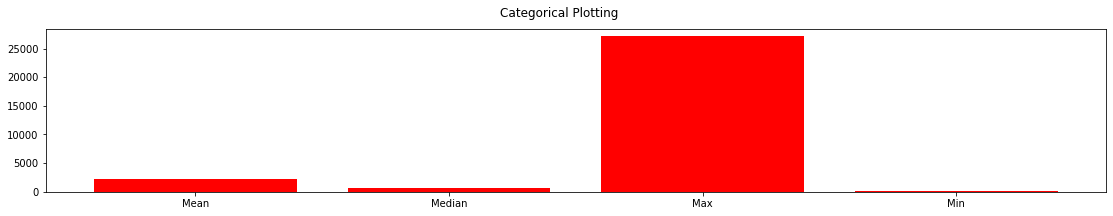

In [15]:
#Malicious Web Sites
names = ['Mean', 'Median', 'Max', 'Min']
values = compare(1).values
fig, axs = plt.subplots(figsize=(19, 3), sharey=True)
axs.bar(names, values[0], color="red")
fig.suptitle('Categorical Plotting')

compare(1)


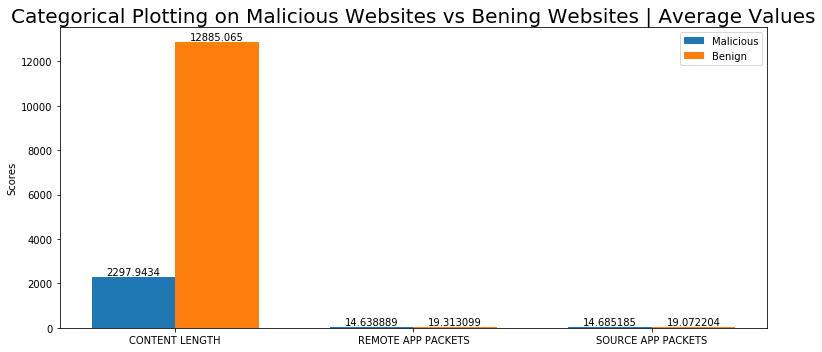

In [16]:
from decimal import *
getcontext()
Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999,
        capitals=1, flags=[], traps=[Overflow, DivisionByZero,
        InvalidOperation])

getcontext().prec = 8

labels = ["Malicious", "Benign",""]

m = [Decimal(compare(1).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(1).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(1).loc["SOURCE_APP_PACKETS", "Mean"])]

b = [Decimal(compare(0).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(0).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(0).loc["SOURCE_APP_PACKETS", "Mean"])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=labels[0])
rects2 = ax.bar(x + width/2, b, width, label=labels[1])



ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites | Average Values', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["CONTENT LENGTH","REMOTE APP PACKETS", "SOURCE APP PACKETS" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

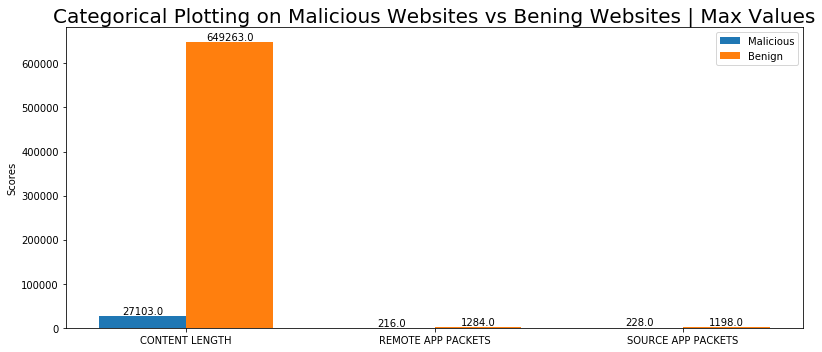

In [17]:
labels = ["Malicious", "Benign",""]

m = [compare(1).loc["CONTENT_LENGTH", "Max"], 
     compare(1).loc["REMOTE_APP_PACKETS", "Max"],
     compare(1).loc["SOURCE_APP_PACKETS", "Max"]]

b = [compare(0).loc["CONTENT_LENGTH", "Max"], 
     compare(0).loc["REMOTE_APP_PACKETS", "Max"],
     compare(0).loc["SOURCE_APP_PACKETS", "Max"]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=labels[0])
rects2 = ax.bar(x + width/2, b, width, label=labels[1])



ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites | Max Values', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["CONTENT LENGTH","REMOTE APP PACKETS", "SOURCE APP PACKETS" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

##### Will you use supervised or unsupervised model? If it is supervised, will you use classification or regression and why. #####
4) statistical analysis of our data provides that URLs distributions are different then the trusted URLs (WHOIS, URL_Length, Special_Char_Sets and ETC). Therefore, one of the best approach to the problem would be building a predictive model ,and we can apply our classification algorithm such as Logistics Regression, Naive Bayes and SVM. 
Although not all the classification algorithms can be a perfect fit to our scenario. Our main event loop( occurance of the events in our system) listens several sub-events and they are asynchronously working.It s means there can be scalability issue during the computation which is highly cost effective and can exhaust our CPU/GPU. There are more other factors such as unappropriated data type for the SVM and etc.  Logistic regression algorithm would be better for the prediction and also we will be applying heuristic search for the blacklisting data (such banned zones /countries ). Applying heuristic search can shorten our worse case scenario in list look up so we can enhance and gain some time / space for the computation. Here are some of our variables types that we can apply for this use case; Type, URL, Url_length,number_special_characters, charset ,content_length, app_bytes ,source_app_packets, remote_app_packets.

### Creating the model ###
I implemented the ARIMA model and linear regression therefore i can see square root test mean error and i can compare.

[  324. 12846.  6666.   445.   324. 18438.  7314.   324.     0.  9136.
  5019.   210.  8654.   238. 26856.   324. 10210. 13684.   324.   770.
  6813.   324.    34. 20404.  7159.   388.   199.   324.]

 Degree 2
 Actual=324.000000, Predicted=9646.987886

 Degree 2
 Actual=12846.000000, Predicted=5608.806742

 Degree 2
 Actual=6666.000000, Predicted=6387.253186

 Degree 2
 Actual=445.000000, Predicted=9944.119191

 Degree 2
 Actual=324.000000, Predicted=3602.411413

 Degree 2
 Actual=18438.000000, Predicted=253.238879

 Degree 2
 Actual=7314.000000, Predicted=9170.934342

 Degree 2
 Actual=324.000000, Predicted=13215.040599

 Degree 2
 Actual=0.000000, Predicted=3864.676083

 Degree 2
 Actual=9136.000000, Predicted=48.288359

 Degree 2
 Actual=5019.000000, Predicted=4414.109708

 Degree 2
 Actual=210.000000, Predicted=7141.011334

 Degree 2
 Actual=8654.000000, Predicted=2537.657882

 Degree 2
 Actual=238.000000, Predicted=4295.531400

 Degree 2
 Actual=26856.000000, Predicted=4465.54140

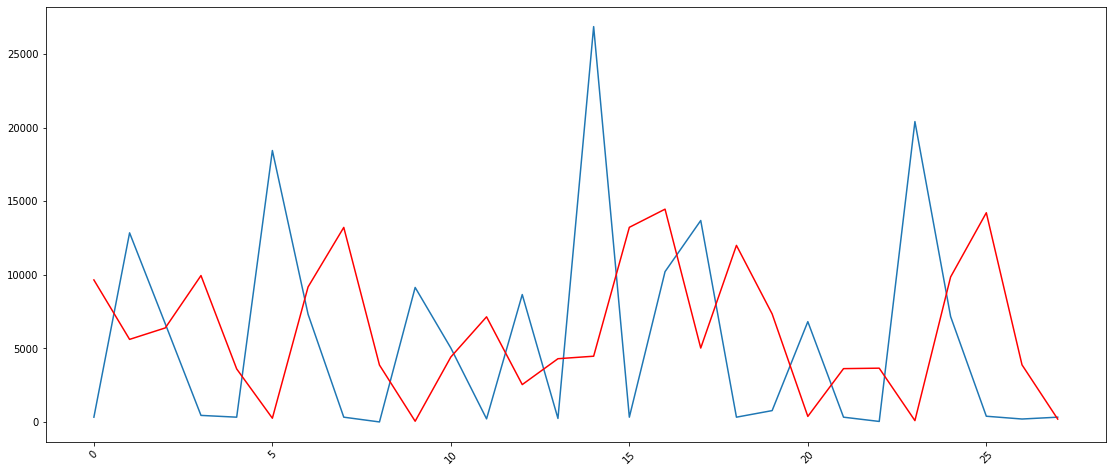


 Test Mean Squared Error (smaller the better fit): 91801589.330


In [46]:
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA


raw_values = targetedVariables.head(150).dropna()

values = raw_values["CONTENT_LENGTH"].values



def StartARIMAForecasting(Actual, P, D, Q):
        """
            P — Auto regressive feature of the model
            D — Differencing order
            Q — Moving average feature of the model

        """
        model = ARIMA(Actual, order=(P, D, Q))
        model_fit = model.fit(disp=0)
        prediction = model_fit.forecast()[0]
        return prediction


# #predict next value
predicted = StartARIMAForecasting(values, 3,1,0)

#Use 70% of data as training, rest 30% to Test model
NumberOfElements = len(values)
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = values[0:TrainingSize]
TestData = values[TrainingSize:NumberOfElements]
print(TestData)

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,0)# third order auto regression    
    print("\n Degree 2\n",'Actual=%f, Predicted=%f' % (ActualValue, Prediction))
#     add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)


#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
# plot
plt.subplots(figsize=(19, 8))
plt.plot(TestData)
plt.plot(Predictions, color='red')
plt.plot(Predictions2, color='green', linestyle="dashed")
plt.xticks(rotation=45)
plt.show()

print('\n Test Mean Squared Error (smaller the better fit): %.3f' % Error)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

raw_values = targetedVariables.dropna()

values = raw_values["CONTENT_LENGTH"].head(350)


X = values[:len(values)//2].values.reshape(-1,1) 
y = values[len(values)//2:].values.reshape(-1,1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)        

reg = LinearRegression()
reg.fit(X_train, y_train)

t = sm.add_constant(X)


#Calculating the coefficient for the data set, so define and retriving our slope 
#and the intercept:
coeff_df = pd.DataFrame([{"Coefficient":reg.coef_[0][0], "Intercept":reg.intercept_[0]}])



y_pred = reg.predict(X_test)
# y_pred = reg.intercept_ + np.sum(reg.coef_ * X_test, axis=1)


df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(sm.OLS(y, X).fit().summary())
df.head(10)



Mean Absolute Error: 15931.063455669826
Mean Squared Error: 604057270.636698
Root Mean Squared Error: 24577.576581849928
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              1.844
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                       0.176
Time:                        22:14:02   Log-Likelihood:                         -2035.0
No. Observations:                 175   AIC:                                      4072.
Df Residuals:                     174   BIC:                                      4075.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  

,Actual,Predicted
0,324.0,19044.488505
1,8769.0,15208.519704
2,7797.0,19905.972121
3,324.0,14991.255429
4,670.0,15424.363950
5,7942.0,46052.946534
6,19879.0,15053.263316
7,324.0,15208.519704
8,10588.0,15050.423260
9,1007.0,15083.557245


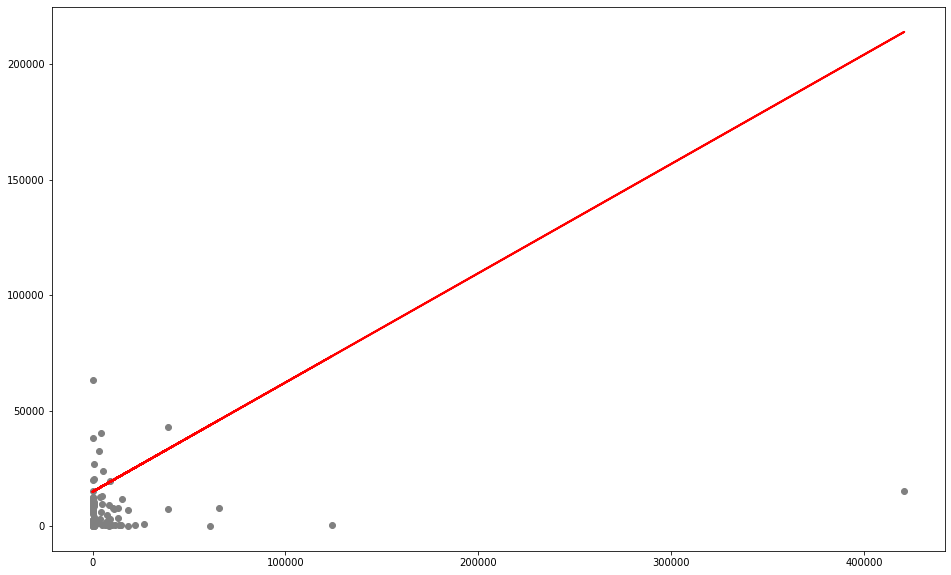

In [42]:
df2 = df.head(10)
fig = plt.subplots(figsize=(16,10))

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

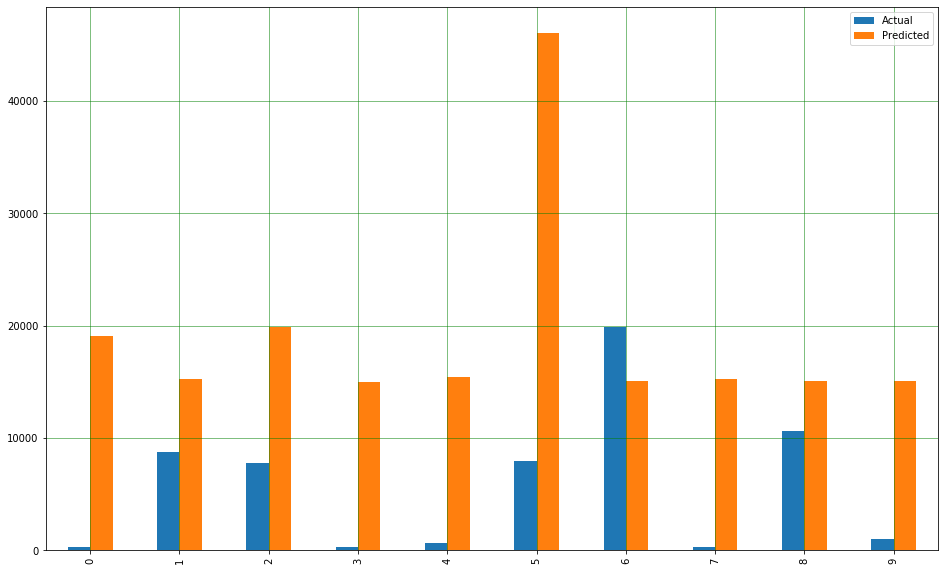

In [43]:
df1 = df.head(10)

df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()